### Credit -card-customer-Chrun-Prediction Model

In [1]:
import pandas as pd
import numpy as np
import kagglehub

d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rjmanoj/credit-card-customer-churn-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sande\.cache\kagglehub\datasets\rjmanoj\credit-card-customer-churn-prediction\versions\1


In [3]:
import os

# Read the dataset
df = pd.read_csv(os.path.join(path, "Churn_Modelling.csv"))

In [4]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()  

0

In [7]:
df.isnull().sum()  # Check for missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True).astype(np.int8)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,107,42,2,0,1,1,1,-28,1,0,0,0
1,96,41,1,95,1,0,1,-98,0,0,1,0
2,-10,42,8,-84,3,1,0,11,1,0,0,0
3,-69,39,1,0,2,0,0,-126,0,0,0,0
4,82,43,2,70,1,1,1,-20,0,0,1,0


In [14]:
X = df.drop(columns=['Exited'])
y= df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[-1.06231521, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 1.6281146 ,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [ 0.65583056, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [-0.4096862 , -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [-1.31537544,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.91580666,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [17]:
X_test

array([[ 1.14863206, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [ 1.50824396,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 1.21522686,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [-0.476281  ,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [-0.98240146, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 1.57483876,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 11) (8000,)
(2000, 11) (2000,)


In [29]:
# Ensure TensorFlow is installed
# %pip install tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [30]:
model=Sequential()
# model.add(Dense(3, input_dim=11, activation='relu'))
# model.add(Dense(11, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [33]:
history=model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6831 - loss: 0.6085 - val_accuracy: 0.7994 - val_loss: 0.4646
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7928 - loss: 0.4664 - val_accuracy: 0.8044 - val_loss: 0.4345
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8072 - loss: 0.4347 - val_accuracy: 0.8206 - val_loss: 0.4213
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8210 - loss: 0.4211 - val_accuracy: 0.8288 - val_loss: 0.4096
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4053 - val_accuracy: 0.8369 - val_loss: 0.3968
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8398 - loss: 0.3911 - val_accuracy: 0.8487 - val_loss: 0.3838
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8566 - loss: 0.3700 - val_accuracy: 0.8519 - val_loss: 0.3744
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3651 - val_accu

In [35]:
import matplotlib.pyplot as plt

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [36]:
history.history

{'accuracy': [0.7517187595367432,
  0.7965624928474426,
  0.80859375,
  0.8189062476158142,
  0.8287500143051147,
  0.8395312428474426,
  0.8482812643051147,
  0.8509374856948853,
  0.8545312285423279,
  0.8564062714576721,
  0.858593761920929,
  0.8589062690734863,
  0.8584374785423279,
  0.8582812547683716,
  0.860156238079071,
  0.8614062666893005,
  0.8603125214576721,
  0.8600000143051147,
  0.8614062666893005,
  0.8604687452316284,
  0.8615624904632568,
  0.8617187738418579,
  0.8628125190734863,
  0.8603125214576721,
  0.8623437285423279,
  0.8618749976158142,
  0.8617187738418579,
  0.8612499833106995,
  0.8614062666893005,
  0.8629687428474426,
  0.8621875047683716,
  0.862500011920929,
  0.8621875047683716,
  0.8629687428474426,
  0.862500011920929,
  0.8645312786102295,
  0.8637499809265137,
  0.862500011920929,
  0.86328125,
  0.8635937571525574,
  0.8628125190734863,
  0.8634374737739563,
  0.8629687428474426,
  0.8645312786102295,
  0.862500011920929,
  0.8650000095367432

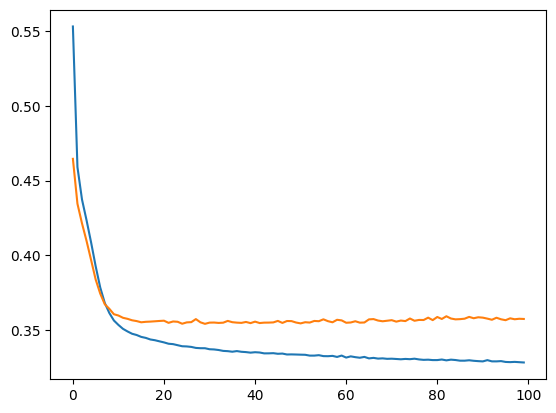

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

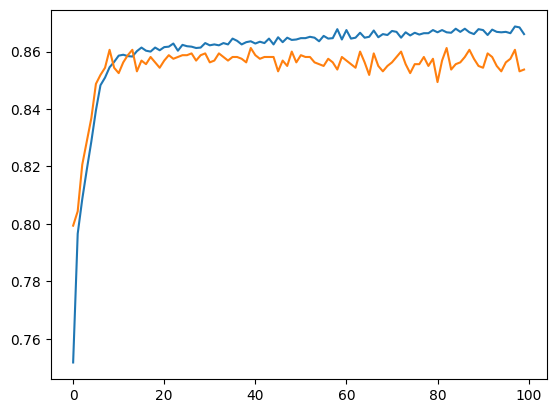

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

In [24]:
model.layers[0].get_weights()

[array([[ 0.10529388,  0.06535057, -0.10552714,  0.0982491 , -0.02848672,
          0.29249325,  0.3112717 ,  0.1675677 , -0.29136777,  0.11410362,
         -0.11998079],
        [ 0.6338292 ,  0.11712694, -0.6908845 ,  0.9173709 , -0.4665213 ,
         -0.7086846 , -0.83229876, -0.1609709 ,  0.45481923,  0.3170427 ,
         -1.1063279 ],
        [-0.15347181,  0.06341387,  0.09104702,  0.28673172, -0.50065243,
          0.0499779 , -0.12836966,  0.06781886,  0.14554898, -0.01654206,
         -0.10349625],
        [ 0.09492589,  0.0880475 , -0.13971505,  0.70222664,  0.4879091 ,
          0.21325052,  0.29043356,  0.31357178,  0.37932682, -0.32530704,
         -0.20901132],
        [ 0.04968157,  0.93554986, -0.21549444,  0.51629925,  0.3823622 ,
         -0.05883625, -0.5389844 , -1.0821246 ,  0.5350362 , -0.0956324 ,
          0.15624434],
        [ 0.48443812,  0.0594414 , -0.18015587, -0.36512586, -0.59907466,
          0.11066018, -0.01229594, -0.06460826,  0.66672677, -0.0710999

In [25]:
model.layers[1].get_weights()

[array([[ 0.31559688,  0.40237346, -1.7388846 , -0.1757785 ,  0.5062734 ,
          0.5339219 ,  0.27542093, -0.02784783, -0.14763471,  0.47201955,
          0.37426937],
        [ 0.6593426 , -0.41175404,  0.37211215, -0.26261497, -0.16538545,
         -0.4889911 ,  0.58425885, -0.4928795 ,  0.90616935, -0.38606754,
          0.47764978],
        [-0.4609895 , -0.05491926, -1.1616502 , -0.00427216, -0.3406956 ,
          0.2450583 , -0.2803024 , -0.43014458, -0.32713974,  0.4586561 ,
         -0.23000433],
        [ 0.02769259,  0.47071406,  0.35976717, -0.2851678 , -0.44044474,
          0.7899855 ,  0.32517537,  0.32440662,  0.2995777 ,  0.28633603,
          0.31515306],
        [-0.15907772, -1.1980002 , -0.4235148 , -0.2908089 ,  0.36880076,
          0.05122045,  0.14823055, -0.14921099,  0.45228326,  0.55870754,
         -0.2907658 ],
        [-1.0336107 ,  0.22241879, -1.0129825 , -0.4725609 , -1.002537  ,
          0.615364  , -0.32740107,  0.05238358,  0.05203647,  0.0244082

In [26]:
y_log=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [27]:
y_pred=np.where(y_log>0.5, 1, 0)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.862